Import Dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']

f = pd.read_csv("Fer-2013/fer2013.csv")
label = f['emotion']
image = f['pixels']
f.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


Data Preprocessing

In [2]:
X, Y = [], []
for i in range(len(image)):
    X.append(list(map(int, image[i].split(' '))))
    Y.append(label[i])

In [3]:
X, Y = np.array(X), np.array(Y)
N = X.shape[0] # number of data
X = X.reshape(N, 48, 48, 1)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,
                                                    random_state = 0)

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Deep Learning Model

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 8192)              0

In [7]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

acc_train = []
loss_train = []
acc_test = []
loss_test = []
for i in range(20):
    print("Epoch: {}".format(i+1))
    history = model.fit(x_train, y_train, epochs = 1)
    test = model.evaluate(x_test, y_test)
    acc_train.append(history.history['accuracy'][0])
    loss_train.append(history.history['loss'][0])
    acc_test.append(test[1])
    loss_test.append(test[0])

Epoch: 1
225/225 [==============================] - 0s 973us/step - loss: 1.6293 - accuracy: 0.3530
Epoch: 2
225/225 [==============================] - 0s 948us/step - loss: 1.5113 - accuracy: 0.3980
Epoch: 3
225/225 [==============================] - 0s 955us/step - loss: 1.3635 - accuracy: 0.4795
Epoch: 4
225/225 [==============================] - 0s 966us/step - loss: 1.3133 - accuracy: 0.4953
Epoch: 5
225/225 [==============================] - 0s 1ms/step - loss: 1.2588 - accuracy: 0.5177
Epoch: 6
225/225 [==============================] - 0s 945us/step - loss: 1.2660 - accuracy: 0.5256
Epoch: 7
225/225 [==============================] - 0s 934us/step - loss: 1.2250 - accuracy: 0.5371
Epoch: 8
225/225 [==============================] - 0s 989us/step - loss: 1.2143 - accuracy: 0.5386
Epoch: 9
225/225 [==============================] - 0s 980us/step - loss: 1.2213 - accuracy: 0.5414
Epoch: 10
225/225 [==============================] - 0s 922us/step - loss: 1.2240 - accuracy: 0.5369
E

Train & Test(Validation) Graph

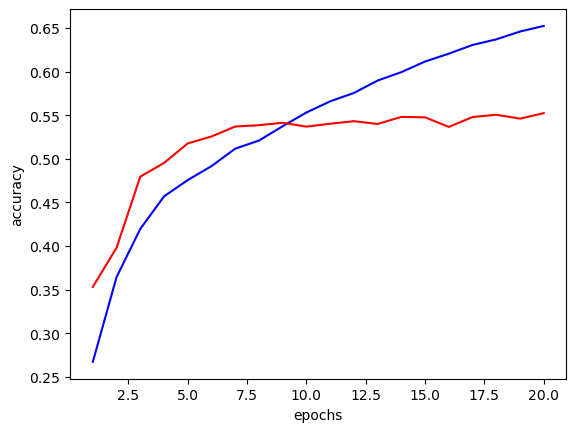

In [9]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
plt.plot(epochs, acc_train, 'b', label = 'Train Accuracy')
plt.plot(epochs, acc_test, 'r', label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

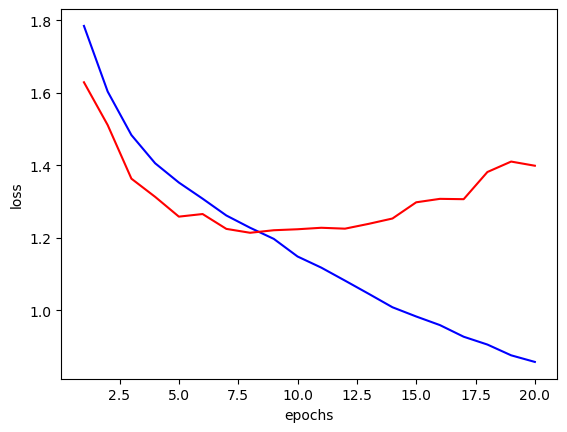

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
plt.plot(epochs, loss_train, 'b', label = 'Train Loss')
plt.plot(epochs, loss_test, 'r', label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [13]:
# Save Model
import h5py

model.save('fer2013.h5')

# If you want to load:

model = tf.keras.models.load_model('fer2013.h5')

Test(Prediction) (교재 p.274 참고)

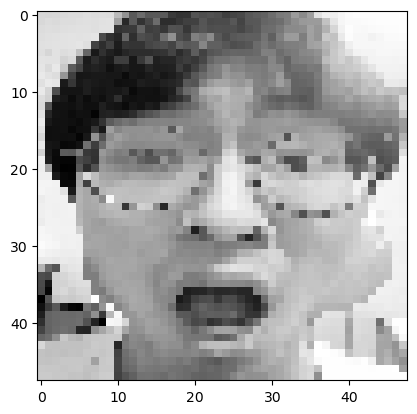

1/1 [==============================] - 0s 10ms/step
[[1.88227475e-01 2.75864819e-04 1.36908293e-01 1.00000000e+00
  2.97769785e-01 1.08262745e-03 1.09387495e-01]]
3
Happy


In [22]:
import cv2 as cv

test_image = cv.imread('test05.jpg', cv.IMREAD_GRAYSCALE)
im = cv.resize(test_image, (48, 48))
im = im.astype('float32')
im = 255-im
im /= 255.0

plt.imshow(im, cmap = 'Greys')
plt.show()

pred = model.predict(im.reshape(-1, 48, 48, 1))
print(pred / np.max(pred))
print(pred.argmax())
print(label_map[pred.argmax()])

cf) Check CPU & GPU

In [1]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7975355116373150487
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22388146176
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6794092180754679589
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]
